In [14]:
import glob
import numpy as np
from rdkit import Chem
from rdkit.Chem.rdMolAlign import CalcRMS

In [15]:
target_dirs = sorted(glob.glob('../Targets/*/'))
target_dirs.remove('../Targets/5HT2A_AF/')
target_dirs.remove('../Targets/BRD4_holo/')
#target_dirs.remove('../Targets/HDAC6/')

In [25]:
rmsd_list_8 = []
for target in target_dirs:
    test_sdf = glob.glob(f'{target}/*ligand*.sdf')[0]
    docked_sdf =  f'{target}/redock_8.sdf'

    mol = Chem.SDMolSupplier(test_sdf)[0]
    checks = Chem.SDMolSupplier(docked_sdf)
    rmsd_list_8.append((target, 
                      np.min(
                          [CalcRMS(Chem.RemoveHs(check), Chem.RemoveHs(mol)) 
                           for check in checks])
                        ))

In [26]:
rmsd_list_8

[('../Targets/5HT2A/', 0.4265097888677357),
 ('../Targets/BCL2/', 0.4100675790096538),
 ('../Targets/BRAF/', 0.34949404989082583),
 ('../Targets/BRD4/', 0.5839817586572755),
 ('../Targets/BTK/', 0.21764697535769473),
 ('../Targets/Beta2AR/', 0.7391649487283417),
 ('../Targets/DRD2/', 0.6765354694170194),
 ('../Targets/HDAC6/', 4.122816423377296),
 ('../Targets/HIV-RT/', 0.3259310701666842),
 ('../Targets/JAK2/', 0.6903930588857161),
 ('../Targets/MEK1/', 0.3561567753793943),
 ('../Targets/NAMPT/', 0.2410266453112602),
 ('../Targets/PI3K-alpha/', 0.6910978464250439),
 ('../Targets/PPAR-alpha/', 7.296895120529004),
 ('../Targets/PRMT5/', 0.4820474954595121),
 ('../Targets/ROCK1/', 5.065602905874089),
 ('../Targets/RXR-alpha/', 0.5471239618492592),
 ('../Targets/TYK2/', 0.9588683530696579)]

In [27]:
rmsd_8 = [rmsd[-1] for rmsd in rmsd_list_8]
np.mean(rmsd_8), np.median(rmsd_8), np.min(rmsd_8), np.max(rmsd_8)

(1.3434089014586368,
 0.5655528602532673,
 0.21764697535769473,
 7.296895120529004)

In [24]:
rmsd_list_32 = []
for target in target_dirs:
    test_sdf = glob.glob(f'{target}/*ligand*.sdf')[0]
    docked_sdf =  f'{target}/redock_32.sdf'

    mol = Chem.SDMolSupplier(test_sdf)[0]
    checks = Chem.SDMolSupplier(docked_sdf)
    rmsd_list_32.append((target, 
                      np.min(
                          [CalcRMS(Chem.RemoveHs(check), Chem.RemoveHs(mol)) 
                           for check in checks])
                        ))
rmsd_list_32

[('../Targets/5HT2A/', 0.4034506165567232),
 ('../Targets/BCL2/', 0.4100675790096538),
 ('../Targets/BRAF/', 0.35763715317809686),
 ('../Targets/BRD4/', 0.5724569124979336),
 ('../Targets/BTK/', 0.2477498738647509),
 ('../Targets/Beta2AR/', 0.7391649487283417),
 ('../Targets/DRD2/', 0.6670836942786212),
 ('../Targets/HDAC6/', 4.122816423377296),
 ('../Targets/HIV-RT/', 0.34630216213589954),
 ('../Targets/JAK2/', 0.6903930588857161),
 ('../Targets/MEK1/', 0.3558122796902579),
 ('../Targets/NAMPT/', 0.23646379215431704),
 ('../Targets/PI3K-alpha/', 0.6670067465925663),
 ('../Targets/PPAR-alpha/', 4.824944807974492),
 ('../Targets/PRMT5/', 0.4925478287804785),
 ('../Targets/ROCK1/', 5.065602905874089),
 ('../Targets/RXR-alpha/', 0.5392697394179016),
 ('../Targets/TYK2/', 0.9588683530696579)]

In [28]:
rmsd_32 = [rmsd[-1] for rmsd in rmsd_list_32]
np.mean(rmsd_32), np.median(rmsd_32), np.min(rmsd_32), np.max(rmsd_32)

(1.2054243820037105,
 0.5558633259579175,
 0.23646379215431704,
 5.065602905874089)

In [29]:
from scipy import stats

# 请替换为你的数据（示例数据）
group1 = np.array(rmsd_8)
group2 = np.array(rmsd_32)

# 正态性检验（Shapiro-Wilk）
_, p1 = stats.shapiro(group1)
_, p2 = stats.shapiro(group2)
normal = p1 > 0.05 and p2 > 0.05  # 显著性水平α=0.05

# 方差齐性检验（Levene）
_, p_var = stats.levene(group1, group2)
equal_var = p_var > 0.05

# 选择检验方法并执行
if normal and equal_var:
    t_stat, p_value = stats.ttest_ind(group1, group2)
    test_used = "独立样本t检验"
else:
    u_stat, p_value = stats.mannwhitneyu(group1, group2)
    test_used = "曼-惠特尼U检验"

# 输出结果
print(f"正态性检验结果：组1 p值={p1:.3f}, 组2 p值={p2:.3f}")
print(f"方差齐性检验p值={p_var:.3f}")
print(f"选择的检验方法：{test_used}")
print(f"显著性检验结果：p值={p_value:.3f}")

# 判断显著性
alpha = 0.05
if p_value < alpha:
    print("结果显著，拒绝原假设（存在显著差异）")
else:
    print("结果不显著，无法拒绝原假设")

正态性检验结果：组1 p值=0.000, 组2 p值=0.000
方差齐性检验p值=0.807
选择的检验方法：曼-惠特尼U检验
显著性检验结果：p值=0.912
结果不显著，无法拒绝原假设


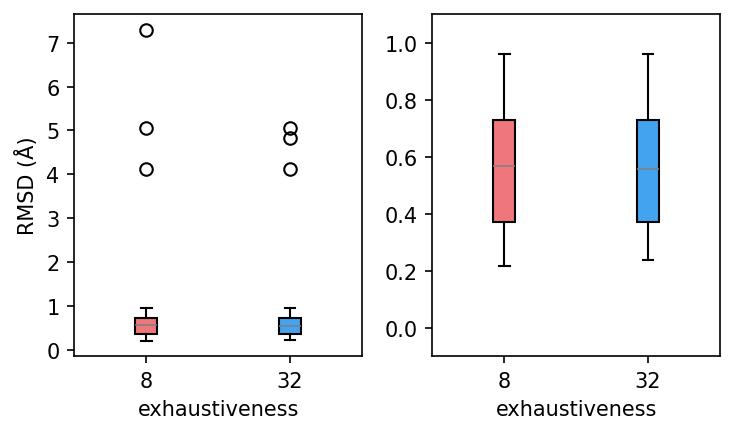

In [63]:
from matplotlib import pyplot as plt
from seaborn import boxplot

fig = plt.figure(dpi=150, figsize=(5,3))

ax1 = plt.subplot(1,2,1)
bplt = plt.boxplot([rmsd_8, rmsd_32], 
                   medianprops={"color": 'grey', "linewidth": 0.75},
                   patch_artist=True)
for patch, color in zip(bplt['boxes'], ['#EF767B','#43A3EF']):
        patch.set(facecolor=color)
ax1.set_ylabel('RMSD (Å)')
ax1.set_xticklabels(['8', '32'])
ax1.set_xlabel('exhaustiveness')

ax2 = plt.subplot(1,2,2)
bplt = plt.boxplot([rmsd_8, rmsd_32],
                    notch=0,
                    sym=[],
                    vert=True,
                    medianprops={"color": 'grey', "linewidth": 0.75},
                    patch_artist=True)
for patch, color in zip(bplt['boxes'], ['#EF767B','#43A3EF']):
        patch.set(facecolor=color)
ax2.set_ylim([-0.1, 1.1])
ax2.set_xticklabels(['8', '32'])
ax2.set_xlabel('exhaustiveness')

plt.tight_layout()

In [66]:
import pandas as pd

tars = [rmsd[0].split('/')[-2] for rmsd in rmsd_list_32]
tars

['5HT2A',
 'BCL2',
 'BRAF',
 'BRD4',
 'BTK',
 'Beta2AR',
 'DRD2',
 'HDAC6',
 'HIV-RT',
 'JAK2',
 'MEK1',
 'NAMPT',
 'PI3K-alpha',
 'PPAR-alpha',
 'PRMT5',
 'ROCK1',
 'RXR-alpha',
 'TYK2']

In [68]:
di = {'Target': tars,
      'exhaust=8': rmsd_8,
      'exhaust=32': rmsd_32}
pd.DataFrame(di).to_csv('hdf.csv')